<a href="https://colab.research.google.com/github/Mike7Chu/SundayDeepLearning/blob/main/MC_Titanic/src/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 타이타닉 데이터를 활용한 데이터 분석
[Youtube Link](https://dacon.io/competitions/open/235539/talkboard/400969?page=1&dtype=recent&ptype)

**데이콘 참고**

### 타이타닉 개요
타이타닉은 역사상 가장 유명한 난파선 중 하나입니다.

1912년 4월 15일, 타이타닉은 항해중 빙산과의 충돌로 인해 침몰합니다. 탑승인원 2224명 중 1502명이 사망한 비극적인 사건이었고, 선박의 안전규정을 개선시키는 계기가 되었습니다.

이 과제에서는 여러분은 어떤 종류의 사람들이 많이 살아남았는지에 대한 분석을 해야 합니다.
그리고 머신러닝을 이용해 어떤 승객이 생존했을지 예측해보세요.

## 1. 라이브러리 및 데이터
### Library & Data

In [73]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### pd.read_csv()
* csv파일 읽는 함수

In [183]:
# 데이터 불러오기
train = pd.read_csv('/content/data/train.csv')
# 모델 시험지 파일
test = pd.read_csv('/content/data/test.csv')
# 답안지 파일
submission = pd.read_csv('/content/data/submission.csv')

## 2. 탐색적 자료분석
### Exploratory Data Analysis(EDA)

### pd.DataFrame.head()
* 데이터 프레임의 위에서부터 n개 행을 보여주는 함수
* n의 기본 값(default 값)은 5

In [75]:
type(train)

train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [76]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


* PassengerID : 탑승객 고유 아이디
* Survival : 탑승객 생존 유무 (0: 사망, 1: 생존)
* Pclass : 등실의 등급
* Name : 이름
* Sex : 성별
* Age : 나이
* Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수
* Parch : 함께 탐승한 부모, 자식의 수
* Ticket :티켓 번호
* Fare : 티켓의 요금
* Cabin : 객실번호
* Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)

### pd.DataFrame.tail()
* 데이터 프레임의 아래에서 부터 n개 행을 보여주는 함수
* n의 기본 값(default 값)은 5

In [78]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### pd.DataFrame.shape
* 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [79]:
print("train shape is", train.shape)
print("test shape is", test.shape)

train shape is (891, 12)
test shape is (418, 11)


### pd.DataFrame.info()
* 데이터셋의 column별 정보를 알려주는 함수
* 비어 있지 않은 값은 (non-null)은 몇개인지?
* column의 type은 무엇인지?

In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 
 
 
 
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
   - 아래쪽 울타리: $Q_1$ - $1.5 * IQR$
   - 위쪽 울타리: $Q_3$ + $1.5 * IQR$
   - $IQR$ = $Q_3 - Q_1$
 
 
<img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="700" height="700">

In [81]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### pd.Series.value_counts()
 - series 내 고유값들 각각의 개수를 보여주는 함수
 - 가장 많이 나오는 고유값들 순서로 보여줍니다.
 - 비어 있는 값은 고려하지 않습니다.

In [82]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### pd.Series.unique()
- 해당 series의 고유값들만 보여주는 함수
- [1, 1, 1, 3] 이라는 시리즈가 있다면, unique() 함수 적용시 [1, 3]이 출력됩니다.
- nan 값이 있을시 nan값도 포함하여 출력한다 (Not a Number)
- 출현하는 순서대로 나오기 때문에, 알파벳 순서 또는 오름차순으로 정렬되어 있지 않습니다.

In [83]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### pd.DataFrame.groupby()
 - 집단에 대한 통계량 확인 
 
<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="700" height="500">

In [84]:
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [85]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


### pd.Series.plot(kind = "bar")
- 막대 그래프
- index 값이 x축, value값이 y축으로 대응 됩니다. 
- value_counts()의 결과물을 보여줄 때 유용합니다. 
- groupby된 결과물을 보여줄 때 유용합니다. 

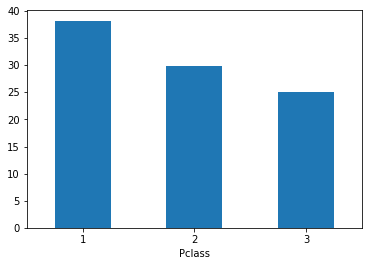

In [86]:
train.groupby('Pclass').mean()['Age'].plot(kind = "bar", rot=0)

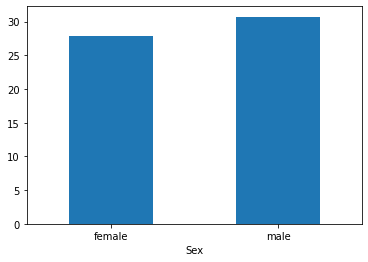

In [87]:
train.groupby('Sex').mean()['Age'].plot(kind = "bar", rot=0)

### pd.Series.plot(kind = 'hist')
- 히스토그램: 구간별로 속해있는 row의 개수를 시각화 합니다.
- 수치형에서만 가능, 범주는 안됩니다!

<img src="http://www.statisticslectures.com/images/continuoushistogram.gif" width="650" height="436">

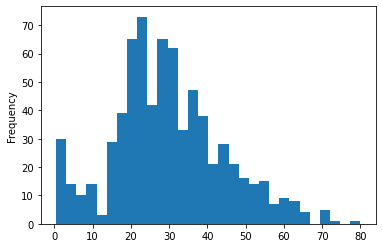

In [88]:
train['Age'].plot(kind = "hist", bins = 30)

- 보조선은 grid = True를 통해 추가 할 수 있습니다. 

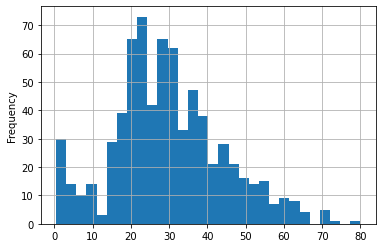

In [89]:
train['Age'].plot(kind = "hist", bins = 30, grid = True)

### pd.DataFrame.plot(x, y, kind = 'scatter')
- 산점도: 두 변수간의 관계를 시각화

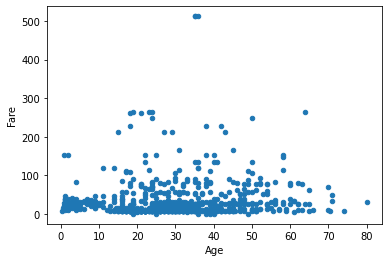

In [90]:
train.plot(x = 'Age', y = 'Fare', kind = 'scatter')

## 3. 데이터 전처리
## Data Cleansing & Pre-Processing  

### pd.Series.isna()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False

In [185]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.
- 범주형 변수일 경우, 최빈값으로 대체할 수 있습니다. 

In [186]:
train['Age'] = train['Age'].fillna(train['Age'].median())

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [187]:
print(train['Embarked'].value_counts())

train['Embarked'] = train['Embarked'].fillna('S')

train.isna().sum()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [188]:
train['Cabin'] = train['Cabin'].fillna(0)

### pd.Series.map()
- 시리즈 내 값을 변환 할 때 사용하는 함수
- 타입에 따라 오류가 발생할 수 있음

In [189]:
train['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [190]:
train['Sex'].map({'male':0, 'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [191]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})

## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling 

x -> Model -> y

x : 탑승객 정보
y : 생존 유무

> 예제의 경우 성별과 Class 정보만 사용하고 있음

In [192]:
x_train = train[['Sex', 'Pclass']]
y_train = train['Survived']

In [193]:
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

In [194]:
x_test = test[['Sex', 'Pclass']]

### sklearn.linear_model.LogisticRegression()
- 로지스틱 회귀 모형
- 0과 1사이의 값을 산출

In [195]:
lr = LogisticRegression()

### sklearn.tree.DecisionTreeClassifier()
- 의사결정 나무 모델


In [196]:
dt = DecisionTreeClassifier()

## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

### model.fit()
- 모델 학습

In [197]:
lr.fit(x_train,y_train)

LogisticRegression()

In [198]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

### model.predict()
- 모델 예측

In [199]:
lr.predict(x_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [200]:
dt.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### model.predict_proba()
- 모델 예측

In [201]:
lr_pred = lr.predict_proba(x_test)[:,1]

In [202]:
dt_pred = dt.predict_proba(x_test)[:,1]

### pd.DataFrame.to_csv()
 - csv파일 저장하는 함수

In [203]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [204]:
submission['Survived'] = lr_pred
submission

,PassengerId,Survived
0,892,0.102021
1,893,0.593544
2,894,0.224759
3,895,0.102021
4,896,0.593544
...,...,...
413,1305,0.102021
414,1306,0.904848
415,1307,0.102021
416,1308,0.102021


In [111]:
submission.to_csv('logistic_regression_pred.csv', index=False)

In [112]:
submission['Survived'] = lr_pred
submission.to_csv('Decision_tree_pred.csv', index=False)

## 6. 결과 및 결언
## Conclusion & Discussion

제출을 통하여 데이콘 플랫폼을 체험 할 수 있었다.
제출 결과 점수는 0.76 점이므로 모델이 대하여 수정이 필요하였다.

In [205]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [206]:
model_10 = DecisionTreeClassifier(min_samples_split=10)
model_20 = DecisionTreeClassifier(min_samples_split=20)
model_30 = DecisionTreeClassifier(min_samples_split=30)

In [207]:
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

In [208]:
train['Age'] = train['Age'].fillna(value = train['Age'].mean())
test['Age'] = test['Age'].fillna(value = train['Age'].mean())

In [209]:
X_train = train[['Pclass', 'Age']]
y_train = train['Survived']

In [210]:
score_10 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_10.fit(X_trn, y_trn)
    
    y_pred = model_10.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_10.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [211]:
score_10

[0.6594982078853047,
 0.6853354978354977,
 0.6597877358490566,
 0.5891534391534392,
 0.6999475890985325]

In [212]:
score_20 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_20.fit(X_trn, y_trn)
    
    y_pred = model_20.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_20.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [213]:
score_20

[0.6728012131237936,
 0.6870265151515151,
 0.6595256813417192,
 0.5970899470899471,
 0.6934617400419287]

In [214]:
score_30 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_30.fit(X_trn, y_trn)
    
    y_pred = model_30.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_30.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [215]:
score_30

[0.6972704714640199,
 0.7009604978354979,
 0.6572327044025157,
 0.6038359788359788,
 0.7021750524109016]

In [216]:
import numpy as np
np.mean(score_10), np.mean(score_20), np.mean(score_30)

(0.6587444939643662, 0.6619810193497808, 0.6722949409897827)

### 다양한 방법의 도전

입력 케이스의 변화 테스트

In [217]:
train['Embarked'] = train['Embarked'].map({'S':0, 'Q':1, 'C':2})

In [218]:
x_train = train[['Sex', 'Age', 'Fare', 'Pclass', 'Embarked']]

In [219]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
 3   Pclass    891 non-null    int64  
 4   Embarked  891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [220]:
model_input = DecisionTreeClassifier(min_samples_split=10)

In [221]:
score_10 = []

for trn_idx, val_idx in kfold.split(x_train):
    
    X_trn, y_trn = x_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = x_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_input.fit(X_trn, y_trn)
    
    y_pred = model_input.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_10.append(roc_auc_score(y_val.values, y_pred))

score_10

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


[0.847601323407775,
 0.8139880952380951,
 0.7993317610062893,
 0.8003968253968254,
 0.8516116352201257]

### 모델 변경(RandomForeset)


In [222]:
from sklearn.ensemble import RandomForestClassifier

x_train = train[['Sex', 'Age', 'Fare', 'Pclass']]

model_random = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

score_10 = []

for trn_idx, val_idx in kfold.split(x_train):
    
    X_trn, y_trn = x_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = x_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_random.fit(X_trn, y_trn)
    
    y_pred = model_random.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_10.append(roc_auc_score(y_val.values, y_pred))

score_10

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


[0.9134270747173974,
 0.8691829004329005,
 0.8497772536687631,
 0.8090608465608466,
 0.8871200209643606]

In [227]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
x_test = test[['Sex', 'Age', 'Fare', 'Pclass']]

y_pred = model_random.predict_proba(x_test)[:, 1]
submission['Survived'] = y_pred
submission.to_csv('model_changed_pred.csv', index=False)

In [226]:
test.info()

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name    

### 데이터 재분석


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

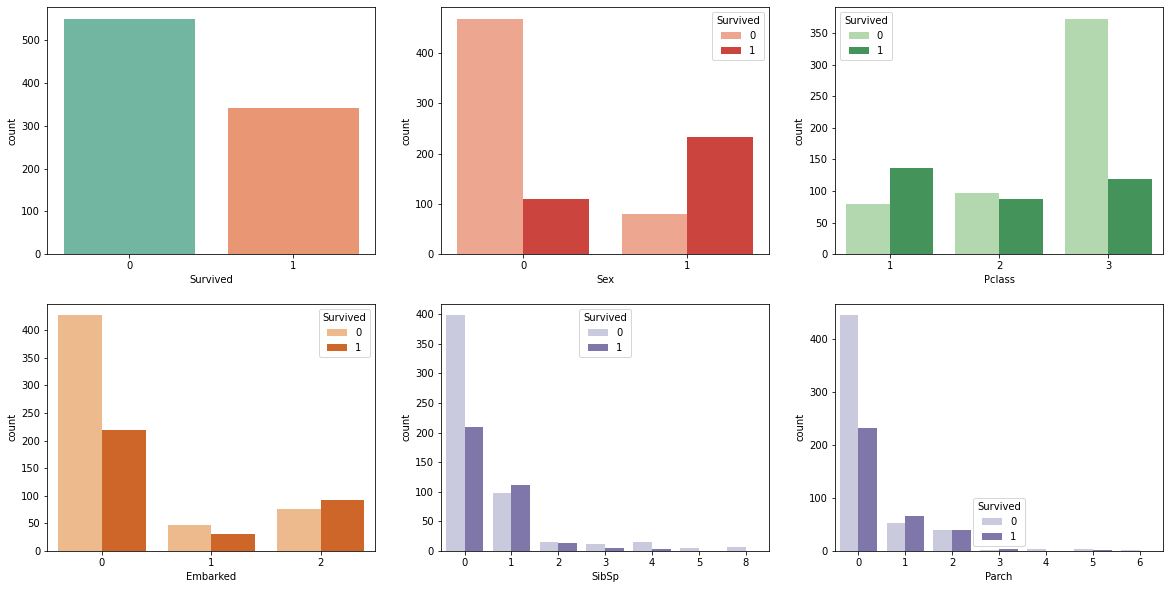

In [237]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(train.Survived, palette="Set2", ax=ax[0,0])
sns.countplot(train.Sex, hue=train.Survived, ax=ax[0,1], palette="Reds")
sns.countplot(train.Pclass, hue=train.Survived, ax=ax[0,2], palette="Greens")
sns.countplot(train.Embarked, hue=train.Survived, ax=ax[1,0], palette="Oranges")
sns.countplot(train.SibSp, hue=train.Survived, ax=ax[1,1], palette="Purples")
sns.countplot(train.Parch, hue=train.Survived, ax=ax[1,2], palette="Purples");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

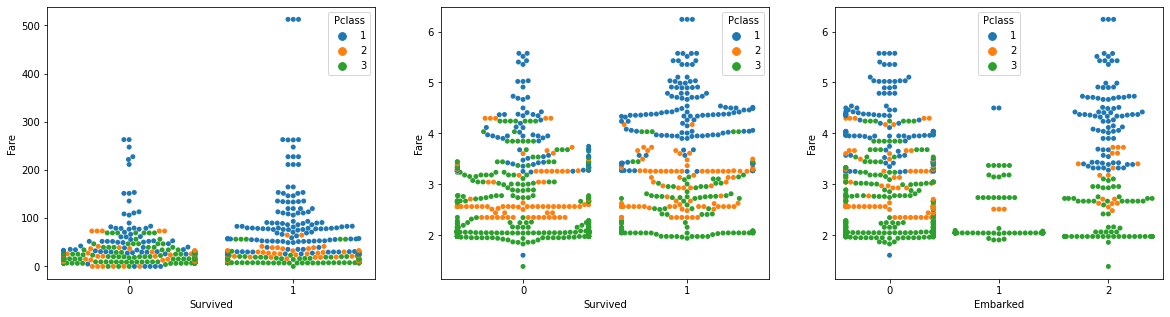

In [236]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.swarmplot(train.Survived, train.Fare, ax=ax[0], hue=train.Pclass);
sns.swarmplot(train.Survived, train.Fare.apply(np.log), ax=ax[1], hue=train.Pclass);
sns.swarmplot(train.Embarked, train.Fare.apply(np.log), ax=ax[2], hue=train.Pclass);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

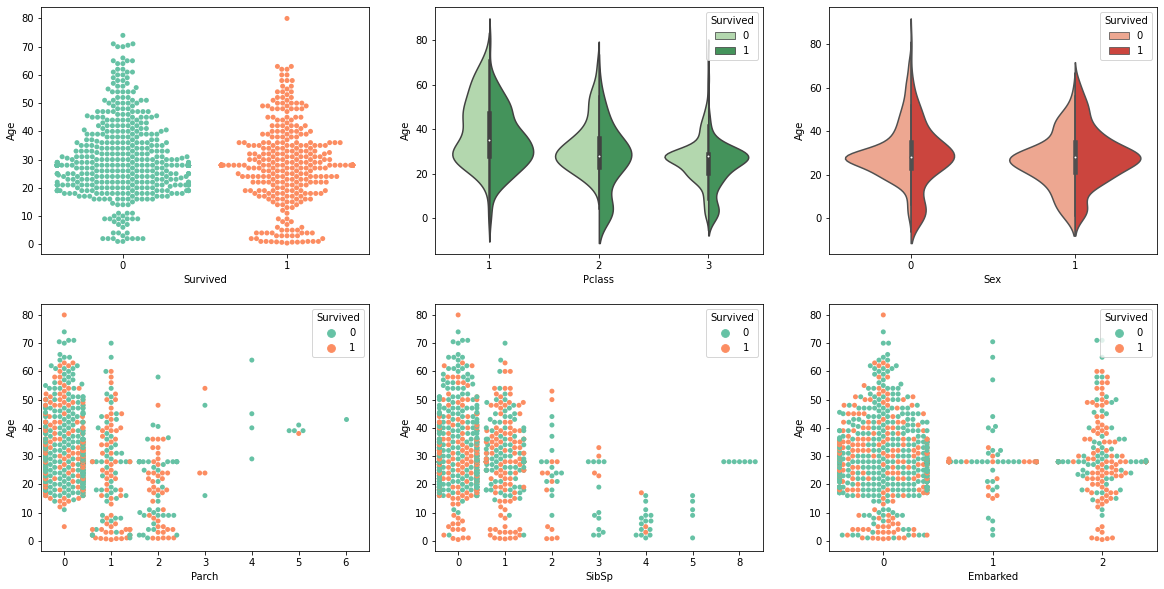

In [238]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.swarmplot(train.Survived, train.Age, ax=ax[0,0], palette="Set2")
sns.violinplot(train.Pclass, train.Age, hue=train.Survived, ax=ax[0,1], split=True, palette="Greens")
sns.violinplot(train.Sex, train.Age, hue=train.Survived, ax=ax[0,2], split=True, palette="Reds");
sns.swarmplot(train.Parch, train.Age, hue=train.Survived, ax=ax[1,0], palette="Set2");
sns.swarmplot(train.SibSp, train.Age, hue=train.Survived, ax=ax[1,1], palette="Set2");
sns.swarmplot(train.Embarked, train.Age, hue=train.Survived, ax=ax[1,2], palette="Set2");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seab

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Deck         204 non-null    object 
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


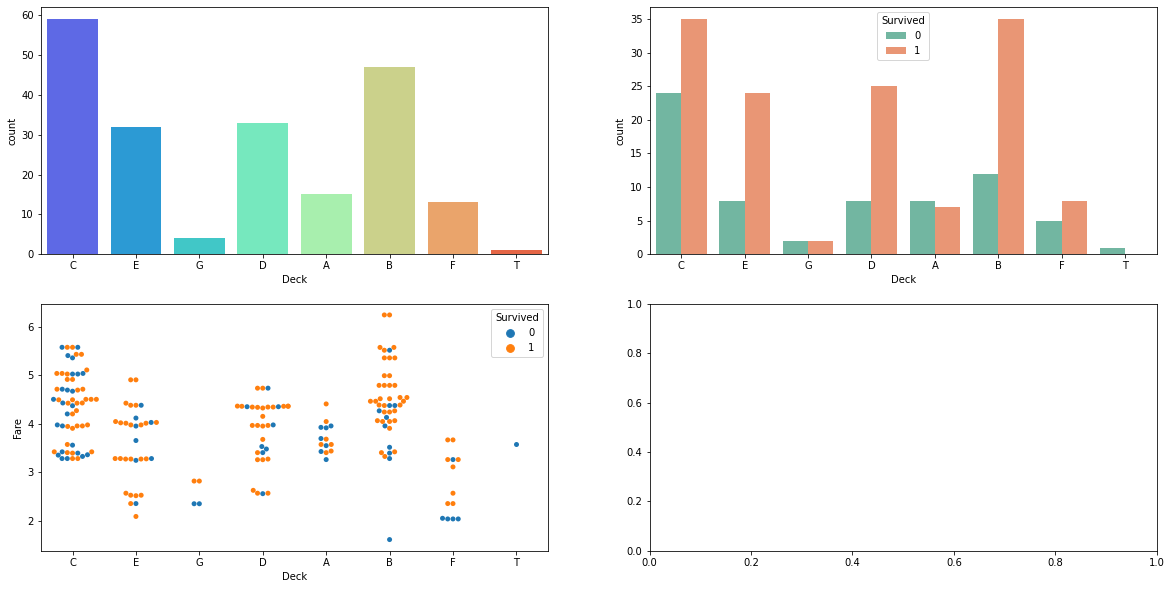

In [261]:
t_train = train
t_train["Deck"] = t_train.Cabin.str.extract(r'([a-zA-Z])')

fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.countplot(t_train.Deck, ax=ax[0,0], palette="rainbow");
sns.countplot(train.Deck, hue=train.Survived, ax=ax[0,1], palette="Set2");
sns.swarmplot(train.Deck, train.Fare.apply(np.log), ax=ax[1,0], hue=train.Survived);
t_train['Deck'].value_counts()

t_train.info()